# IFT 6135 - W2019 - Assignment 1
* Developped using __Python 2.7__

## Weight Initialization
Tests weight different schemes of weight initialization 
* Zeros 
* Normal
* Glorot

__Results__  
Ideal weight initialization should give small values (such that activations functions are not saturated) with evenly spread values to encourage diverse development of weights during training.
* __Zeros__: Results in little change because no gradient can be propegated backwards. Biases are still adjusted somewhat however this is a negligible improvement.
* __Normal__: Results in moderate improvement
* __Glorot__: Yields best results: faster and descent and lowest value of schmes tested after 10 epochs.

TRAINING: g=Sigmoid, w_init=Zeros, layers=784-512-256-10, α=0.10, batch=256
Epoch 1: TrainingCost=2.337794, ValidationCost=2.335217
Epoch 2: TrainingCost=2.306142, ValidationCost=2.305279
Epoch 3: TrainingCost=2.313480, ValidationCost=2.313204
Epoch 4: TrainingCost=2.316895, ValidationCost=2.318640
Epoch 5: TrainingCost=2.311022, ValidationCost=2.311380
Epoch 6: TrainingCost=2.313465, ValidationCost=2.315412
Epoch 7: TrainingCost=2.312609, ValidationCost=2.315774
Epoch 8: TrainingCost=2.311059, ValidationCost=2.310917
Epoch 9: TrainingCost=2.313262, ValidationCost=2.315789
Epoch 10: TrainingCost=2.309388, ValidationCost=2.311756
DONE after 89s: g=Sigmoid, w_init=Zeros, layers=784-512-256-10, α=0.10, batch=256 - cost=2.311756


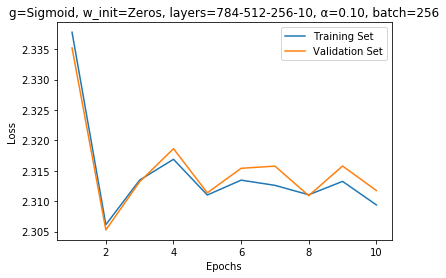

TRAINING: g=Sigmoid, w_init=Normal, layers=784-512-256-10, α=0.10, batch=256
Epoch 1: TrainingCost=1.629842, ValidationCost=1.607973
Epoch 2: TrainingCost=1.121680, ValidationCost=1.127869
Epoch 3: TrainingCost=0.902787, ValidationCost=0.932475
Epoch 4: TrainingCost=0.757786, ValidationCost=0.801932
Epoch 5: TrainingCost=0.679229, ValidationCost=0.740874
Epoch 6: TrainingCost=0.624201, ValidationCost=0.693278
Epoch 7: TrainingCost=0.564504, ValidationCost=0.647158
Epoch 8: TrainingCost=0.524272, ValidationCost=0.612707
Epoch 9: TrainingCost=0.492767, ValidationCost=0.590015
Epoch 10: TrainingCost=0.472027, ValidationCost=0.570492
DONE after 88s: g=Sigmoid, w_init=Normal, layers=784-512-256-10, α=0.10, batch=256 - cost=0.570492


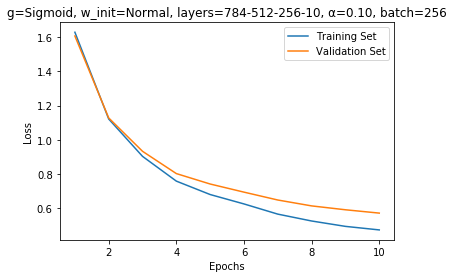

TRAINING: g=Sigmoid, w_init=Glorot, layers=784-512-256-10, α=0.10, batch=256
Epoch 1: TrainingCost=1.789533, ValidationCost=1.776322
Epoch 2: TrainingCost=0.956445, ValidationCost=0.921886
Epoch 3: TrainingCost=0.661382, ValidationCost=0.621249
Epoch 4: TrainingCost=0.531137, ValidationCost=0.492933
Epoch 5: TrainingCost=0.475735, ValidationCost=0.439219
Epoch 6: TrainingCost=0.428503, ValidationCost=0.395840
Epoch 7: TrainingCost=0.406315, ValidationCost=0.373382
Epoch 8: TrainingCost=0.378376, ValidationCost=0.349441
Epoch 9: TrainingCost=0.364805, ValidationCost=0.337456
Epoch 10: TrainingCost=0.352533, ValidationCost=0.326194
DONE after 91s: g=Sigmoid, w_init=Glorot, layers=784-512-256-10, α=0.10, batch=256 - cost=0.326194


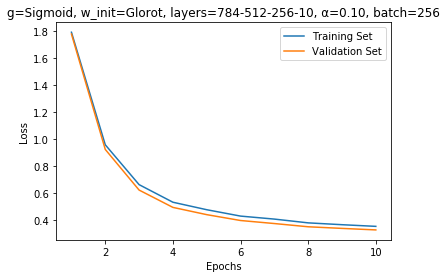

In [3]:
%matplotlib inline
from experiments import weight_initialization_test
weight_initialization_test()

## Hyperparameter Search
Hypyerparameters are tuned on the validation set and the model achieving the highest validation accuracy is selected. The following parameters are tested: 

| Parameter | Value   |
|------|------|
|   learning rate  | 0.1, 0.01|
|   batch size  | 128, 256|
|   hidden layer dimensions  | (512, 256), (256, 512), (512, 512)|
|   activation functions  | sigmoid, tanh, relu|

__Results:__
The model achieving the highest validation accuracy ($ \approx 98 \%$) was: learning rate = 0.1, batch_size = 128, hidden_layers = (512, 256), activation function = relu

In [1]:
%matplotlib inline
from experiments import parameter_search_test
parameter_search_test()

DONE after 215s: g=Sigmoid, w_init=Glorot, layers=784-512-256-10, α=0.10, batch=256 - cost=0.326598
DONE after 224s: g=Sigmoid, w_init=Glorot, layers=784-256-512-10, α=0.10, batch=128 - cost=0.277370
DONE after 249s: g=Sigmoid, w_init=Glorot, layers=784-512-256-10, α=0.10, batch=128 - cost=0.285710
DONE after 294s: g=Sigmoid, w_init=Glorot, layers=784-512-512-10, α=0.10, batch=128 - cost=0.301856
DONE after 198s: g=Sigmoid, w_init=Glorot, layers=784-256-512-10, α=0.01, batch=128 - cost=1.071854
DONE after 176s: g=Sigmoid, w_init=Glorot, layers=784-256-512-10, α=0.10, batch=256 - cost=0.329363
DONE after 257s: g=Sigmoid, w_init=Glorot, layers=784-512-512-10, α=0.10, batch=256 - cost=0.334780
DONE after 232s: g=Sigmoid, w_init=Glorot, layers=784-512-256-10, α=0.01, batch=128 - cost=0.922974
DONE after 267s: g=Sigmoid, w_init=Glorot, layers=784-512-512-10, α=0.01, batch=256 - cost=1.776325
DONE after 203s: g=Sigmoid, w_init=Glorot, layers=784-512-256-10, α=0.01, batch=256 - cost=1.764284


## Validate Gradients using Finite Difference
Gradient computations are validated using the finite difference approximation of the derivative (Taylor series expanded to 1st order derivative):  
$$ \partial f/\partial x \approx (f(x+\epsilon) - f(x-\epsilon))/(2\epsilon) $$

$$ \epsilon = 1/N $$

The first 10 weights of the first layer of the network are inspected for different values of N:

$$ N = {1, 10, 100, 1000, 10000} $$

For each N value, the maximum difference of the 10 inspected weights is calculated and plotted: 

$$ max_{1<i<p}|\nabla_{i}^{N}-\partial L/\partial \theta_i | $$

__Results__: 
The gradients computed previously calculated generally match with those found by finite difference approximation. Note that at lower values of N, the finite difference approximation is more acccurate as expected.

TRAINING: g=Sigmoid, w_init=Glorot, layers=784-64-64-10, α=0.10, batch=128
Epoch 1: TrainingCost=1.442048, ValidationCost=1.424544
Epoch 2: TrainingCost=0.738516, ValidationCost=0.704068
Epoch 3: TrainingCost=0.537646, ValidationCost=0.505406
Epoch 4: TrainingCost=0.449403, ValidationCost=0.420994
Epoch 5: TrainingCost=0.395016, ValidationCost=0.368743
Epoch 6: TrainingCost=0.359808, ValidationCost=0.336684
Epoch 7: TrainingCost=0.335281, ValidationCost=0.314387
Epoch 8: TrainingCost=0.315353, ValidationCost=0.296024
Epoch 9: TrainingCost=0.298542, ValidationCost=0.281489
Epoch 10: TrainingCost=0.284646, ValidationCost=0.267628
DONE after 19s: g=Sigmoid, w_init=Glorot, layers=784-64-64-10, α=0.10, batch=128 - cost=0.267628


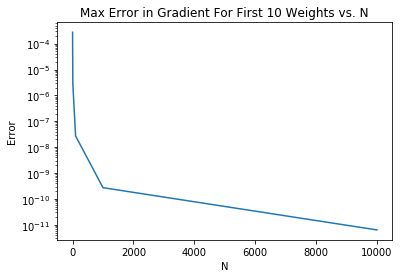

In [2]:
%matplotlib inline
from experiments import finite_difference_gradient_test
finite_difference_gradient_test()